### Importing Libraries


In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import Matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(f"PyTorch version : {torch.__version__}")
print(f"Torchvision version : {torchvision.__version__}")

PyTorch version : 2.0.1+cu118
Torchvision version : 0.15.2+cu118


### Loading dataset

In [ ]:
# Setup training data
train_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

# Setup testing data
test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 145154932.54it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 43953444.78it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 68988512.34it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 3822337.23it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
# Seeing first training sample
image, label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
image.shape, label

(torch.Size([1, 28, 28]), 5)

In [ ]:
# How many samples are there?
len(train_data.data), len(test_data.data)

(60000, 10000)

In [ ]:
# See classes
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

### Visualizingh our data

Image shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, '5 - five')

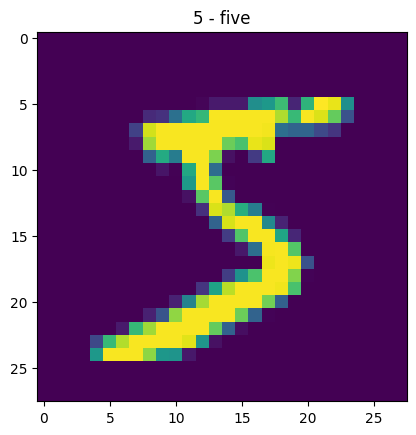

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

Text(0.5, 1.0, '5 - five')

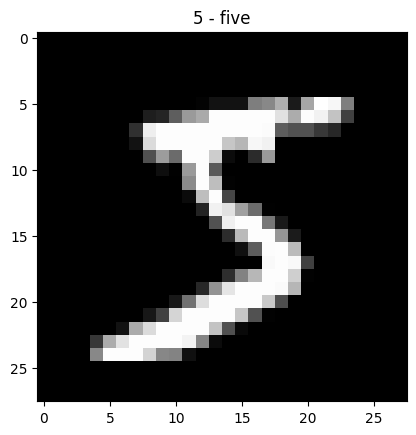

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

### Plotting more images

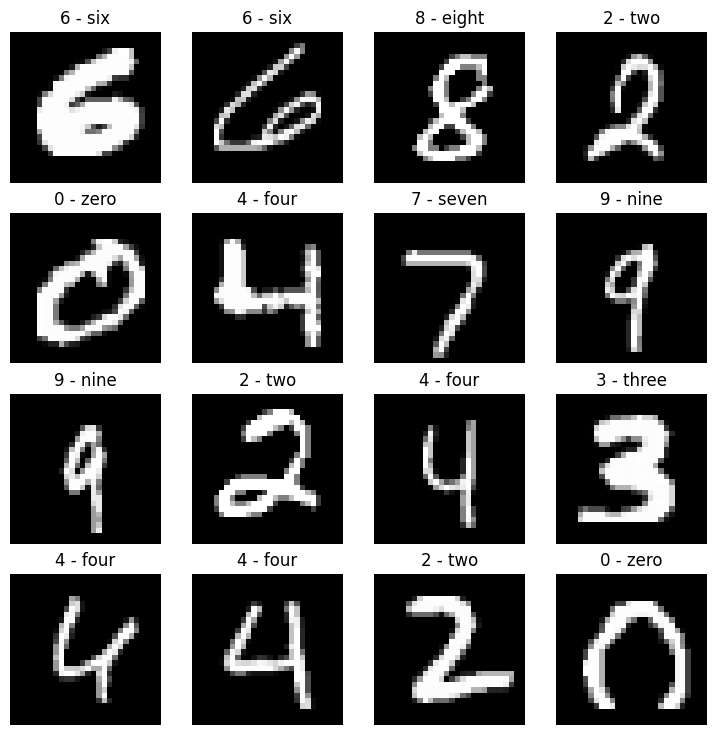

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows * cols +1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(class_names[label])
  plt.axis(False)

### Deivce agnostic code

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

### Prepare DataLoader

In [ ]:
from torch.utils.data import DataLoader

# Setup batch size
BATCH_SIZE = 32

# Turinig data into pytho iterable (batches)
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

# Checking the len of train and test dataloader's
print(f"DataLoaders : {train_dataloader, test_dataloader}")
print(f"Length of train dataloader : {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader : {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders : (<torch.utils.data.dataloader.DataLoader object at 0x7f64f7ac0ac0>, <torch.utils.data.dataloader.DataLoader object at 0x7f64f7ac3100>)
Length of train dataloader : 1875 batches of 32
Length of test dataloader : 313 batches of 32


In [ ]:
# check out what's inside the training dataloader
train_features_batch , train_label_batch = next(iter(train_dataloader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size : torch.Size([1, 28, 28])
Label : 9,label size : torch.Size([])


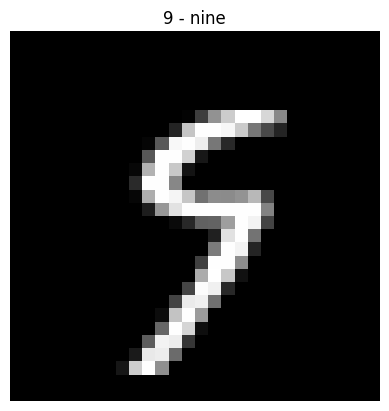

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"Image size : {img.shape}")
print(f"Label : {label},label size : {label.shape}")

### Building Model

In [ ]:
class MNISTDigitRecognitionModel(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.conv2d_block_1 = nn.Sequential(
       nn.Conv2d(in_channels=input_shape,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
       nn.ReLU(),
       nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
       nn.ReLU(),
       nn.MaxPool2d(kernel_size=2,
                    stride=2)
    )
    self.conv2d_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                 out_channels=hidden_units,
                 kernel_size=3,
                 stride=1,
                 padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units * 7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv2d_block_1(x)
    # print(x.shape)
    x = self.conv2d_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
# Creating a instance of model
torch.manual_seed(42)
cnn_model = MNISTDigitRecognitionModel(input_shape=1,
                                       hidden_units=10,
                                       output_shape=len(class_names)).to(device)
cnn_model

MNISTDigitRecognitionModel(
  (conv2d_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2d_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

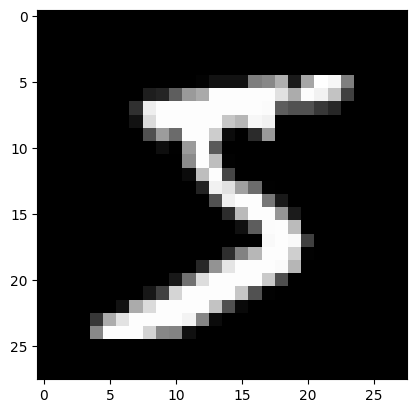

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')

### Setup a accuracy_fn, loss_fn, and optimizer

In [ ]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print("helper_function already Exits, Skpping download")
else :
  print("Downloading helper_functions.py")
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
  with open('helper_functions.py','wb') as f:
    f.write(request.content)
  print('helper_functions.py, downloaded successfully')

helper_functions.py, downloaded successfully


In [ ]:
# Importing from helper_functions
from helper_functions import accuracy_fn

# Loss function
loss_fn = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=cnn_model.parameters(),
                            lr=0.1)

### Building a testing and training loop function

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)

# set the no of epochs
epochs = 3

# create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}\n-----")
  ### Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    cnn_model.train()
    # 1. foward pass
    y_pred = cnn_model(X)

    # 2. calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backward
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch *len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total loss by length of train dataloader
  train_loss /= len(train_dataloader)

  ### Testing
  test_loss, test_acc = 0,0
  cnn_model.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      # 1. forward pass
      test_pred = cnn_model(X_test)

      # 2. calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      # 3. calcuate accuracy
      test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))

    # calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    # calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  # print out what's happening
  print(f"\nTrain Loss : {train_loss:.4f} | Test loss : {test_loss:.4f}, Test acc:{test_acc:.4f}")



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss : 0.3356 | Test loss : 0.0736, Test acc:97.7137
Epoch : 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss : 0.0821 | Test loss : 0.0535, Test acc:98.2927
Epoch : 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train Loss : 0.0658 | Test loss : 0.0566, Test acc:98.2228


### Evaluating model

In [ ]:
def eval_model(model:torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               accuracy_fn,
               device:torch.device=device):
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device),y.to(device)

      # Make prediction
      y_pred = model(X)

      # calculate loss and acc per batch
      loss += loss_fn(y_pred,
                      y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    # scale loss and acc to find average loss/ acc
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {'model_name': model.__class__.__name__,
          'model_loss':loss.item(),
          'model_acc':acc}


In [ ]:
cnn_model_results = eval_model(model=cnn_model,
                               data_loader=test_dataloader,
                               loss_fn=loss_fn,
                               accuracy_fn=accuracy_fn,
                               device=device)
cnn_model_results

{'model_name': 'MNISTDigitRecognitionModel',
 'model_loss': 0.05670509859919548,
 'model_acc': 98.22284345047923}

### Making predictions with model

In [ ]:
def make_predictions(model:torch.nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prepare the sample
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass
      pred_logits = model(sample)

      # get prediction probablities
      pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

      # get pred_prob of the gpu for further calculation
      pred_probs.append(pred_prob.cpu())

  # stack the pred_prob to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample,label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

# view the first sample
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '2 - two')

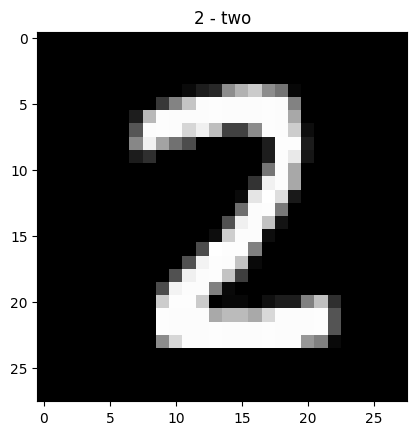

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_prob = make_predictions(model=cnn_model,
                             data=test_samples)

# view first two prediction probablities
pred_prob[:2]

tensor([[3.0917e-11, 1.7314e-06, 1.0000e+00, 8.7696e-08, 3.8930e-14, 1.9631e-15,
         2.0502e-13, 1.4161e-08, 2.6381e-06, 1.4677e-10],
        [5.7498e-09, 9.9961e-01, 1.0036e-06, 7.9291e-08, 3.5479e-06, 1.1205e-04,
         1.1025e-04, 1.6557e-06, 1.1219e-04, 5.0655e-05]])

In [ ]:
# Getting the prediction labels
pred_classes = pred_prob.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

In [ ]:
test_label

NameError: ignored

### Plotting predictions

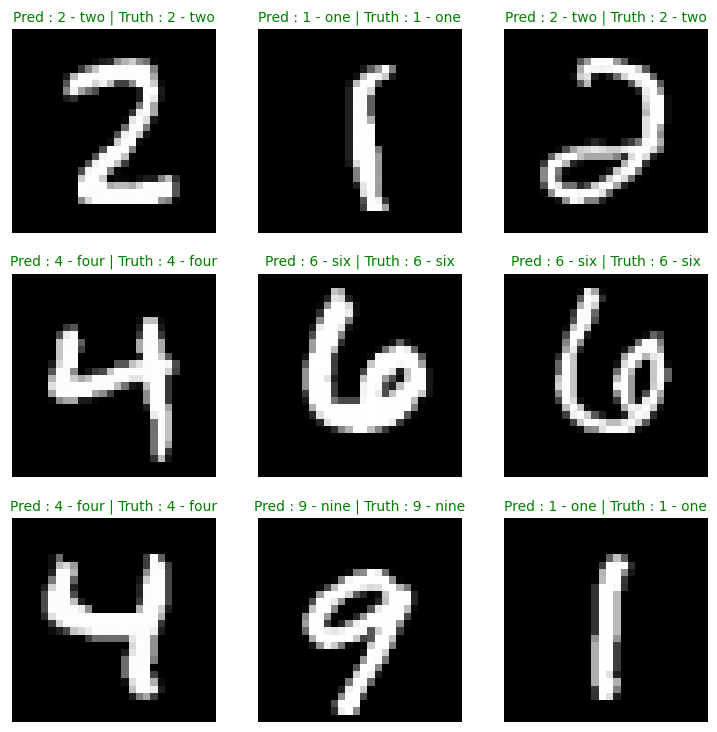

In [ ]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i + 1)

  # plot the image
  plt.imshow(sample.squeeze(),cmap='gray')

  # get the label
  pred_label = class_names[pred_classes[i]]

  # turth label
  truth_label = class_names[test_labels[i]]

  # title
  title_text =f"Pred : {pred_label} | Truth : {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text,fontsize=10, c='r')

  plt.axis(False)

### Saving the trained model

In [ ]:
from pathlib import Path

# Making directory
MODEL_PATH = Path('model')
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = 'DigitRecognitionCNNModel.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME


print(f"Saving model : {MODEL_NAME}")
torch.save(obj=cnn_model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model : DigitRecognitionCNNModel.pth


In [ ]:
# create a new instance of the model
torch.manual_seed(42)

loaded_model_2 = MNISTDigitRecognitionModel(input_shape=1,
                                     hidden_units=10,
                                     output_shape=len(class_names))
# load in save state dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_2

MNISTDigitRecognitionModel(
  (conv2d_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2d_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Make predictions
pred_prob = make_predictions(model=loaded_model_2,
                             data=test_samples)

# view first two prediction probablities
pred_prob[:2]

tensor([[3.0917e-11, 1.7314e-06, 1.0000e+00, 8.7696e-08, 3.8930e-14, 1.9631e-15,
         2.0502e-13, 1.4161e-08, 2.6381e-06, 1.4677e-10],
        [5.7498e-09, 9.9961e-01, 1.0036e-06, 7.9291e-08, 3.5479e-06, 1.1205e-04,
         1.1025e-04, 1.6557e-06, 1.1219e-04, 5.0655e-05]])

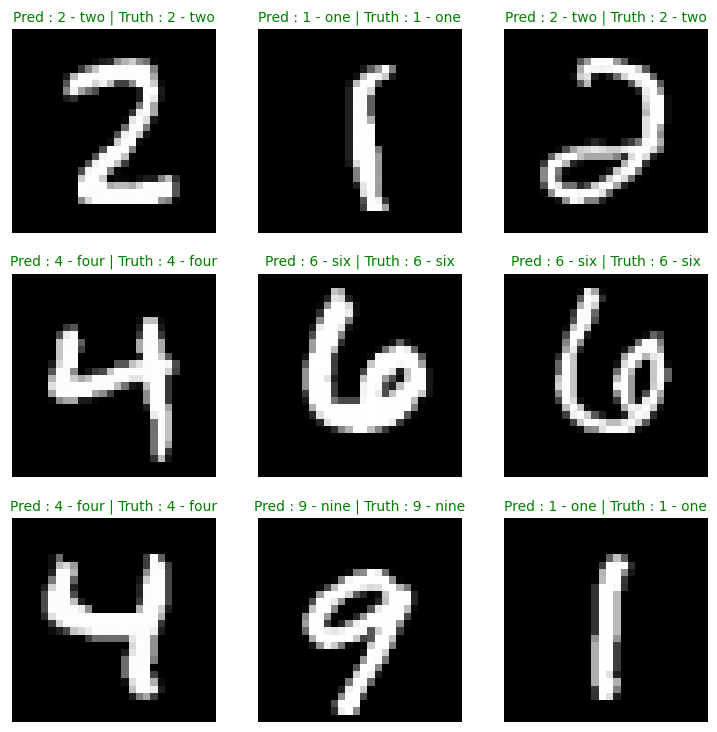

In [ ]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i + 1)

  # plot the image
  plt.imshow(sample.squeeze(),cmap='gray')

  # get the label
  pred_label = class_names[pred_classes[i]]

  # turth label
  truth_label = class_names[test_labels[i]]

  # title
  title_text =f"Pred : {pred_label} | Truth : {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text,fontsize=10, c='r')

  plt.axis(False)